# PROJETO II: Comparação de Imagens usando Medidas Comparativas de Informação

## Objetivo
Estudar de forma empírica como podemos utilizar medidas comparativas de informação para mensurar diferenças entre imagens médicas, para possível auxílio em diagnósticos de doenças por imagens. 

## Tarefas

1. **Referência**: Estudar cada passo de como o autor do tutorial "Mutual information as an image matching metric" implementou a solução de comparação de imagens usando informação mútua como métrica. Descrever, com suas palavras, tudo que foi compreendido e aplicar a abordagem para avaliar problemas pulmonares a partir de tomografias computadorizadas, usando o conjunto de dados "TCIA Chest CT" como feito no capítulo "Image Comparison" do curso "Biomedical Image Analysis in Python", feito por vocês no DataCamp.

2. **Comparação de Desempenho**: Comparar o desempenho dessa abordagem de comparação por informação mútua, com as abordagens descritas no capítulo "Image Comparison" do curso "Biomedical Image Analysis in Python", feito por vocês no DataCamp. Utilizar, para isso, ao menos dois exemplos dos datasets disponíveis.

3. **BÔNUS**: Apresentar uma abordagem para usar entropia relativa (Divergência de Kullback-Leibler) para medida da diferença entre imagens e implementar casos de teste.



1. **Referência**: Estudar cada passo de como o autor do tutorial "Mutual information as an image matching metric" implementou a solução de comparação de imagens usando informação mútua como métrica. Descrever, com suas palavras, tudo que foi compreendido e aplicar a abordagem para avaliar problemas pulmonares a partir de tomografias computadorizadas, usando o conjunto de dados "TCIA Chest CT" como feito no capítulo "Image Comparison" do curso "Biomedical Image Analysis in Python", feito por vocês no DataCamp.


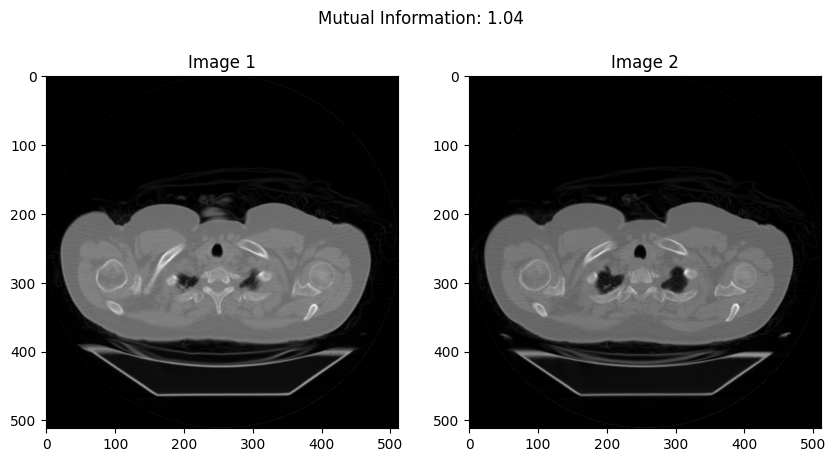

In [3]:
import numpy as np
from skimage import io, color
from scipy.stats import entropy
import pydicom
import matplotlib.pyplot as plt

# Load the images
image1 = pydicom.dcmread('chest-220.dcm').pixel_array
image2 = pydicom.dcmread('chest-221.dcm').pixel_array

# Define a  funçaõ para calcular o histograma conjunto
def joint_histogram(image1, image2,image3,  num_bins=64):
    histogram, x_edges, y_edges = np.histogram2d(image1.ravel(), image2.ravel(), bins=num_bins)
    return histogram

# Define a função para calcular o histograma marginal
def marginal_histogram(image, num_bins=64):
    histogram, edges = np.histogram(image.ravel(), bins=num_bins)
    return histogram

# Define a funçao para calcular a informação mútua
def mutual_information(image1, image2, num_bins=64):
    # Calculate the joint histogram
    joint_hist = joint_histogram(image1, image2, num_bins)

    # Cacula o histograma marginal para cada imagem
    hist1 = marginal_histogram(image1, num_bins)
    hist2 = marginal_histogram(image2, num_bins)

    # Calcula a entropia para cada imagem
    entropy1 = entropy(hist1)
    entropy2 = entropy(hist2)

    # Calcula   a entropia conjunta
    entropy_joint = entropy(joint_hist.ravel())

    # Calcula a informação mútua
    mutual_info = entropy1 + entropy2 - entropy_joint

    return mutual_info

# Calcula a informação mútua
mutual_info = mutual_information(image1, image2)

# Display the images and the mutual information
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(image1, cmap='gray')
ax1.set_title('Image 1')
ax2.imshow(image2, cmap='gray')
ax2.set_title('Image 2')
plt.suptitle(f'Mutual Information: {mutual_info:.2f}')
plt.show()



2. **Comparação de Desempenho**: Comparar o desempenho dessa abordagem de comparação por informação mútua, com as abordagens descritas no capítulo "Image Comparison" do curso "Biomedical Image Analysis in Python", feito por vocês no DataCamp. Utilizar, para isso, ao menos dois exemplos dos datasets disponíveis.

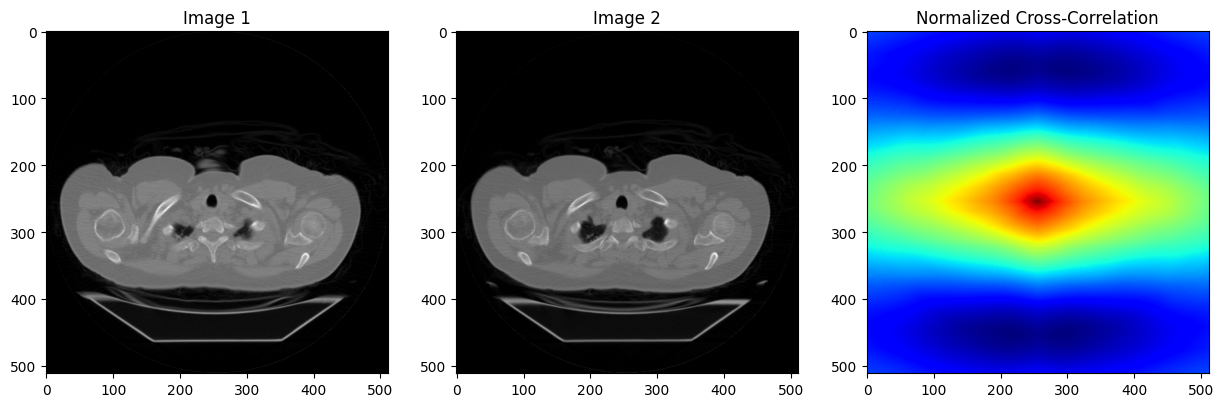

In [4]:
from scipy.signal import correlate2d
import matplotlib.pyplot as plt

def normalized_cross_correlation(image1, image2):
    # Normalize the images
    image1_norm = (image1 - np.mean(image1)) / np.std(image1)
    image2_norm = (image2 - np.mean(image2)) / np.std(image2)

    # Calculate the cross-correlation
    cross_corr = correlate2d(image1_norm, image2_norm, mode='same')

    # Calculate the normalized cross-correlation
    norm_cross_corr = cross_corr / (image1.size * np.std(image1) * np.std(image2))

    return norm_cross_corr
    # Load the images
image1 = pydicom.dcmread('chest-220.dcm').pixel_array
image2 = pydicom.dcmread('chest-221.dcm').pixel_array
    # Calculando a correlação cruzada normalizada
norm_cross_corr = normalized_cross_correlation(image1, image2)
    # Display the images and the normalized cross-correlation
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))
ax1.imshow(image1, cmap='gray')
ax1.set_title('Image 1')
ax2.imshow(image2, cmap='gray')
ax2.set_title('Image 2')
ax3.imshow(norm_cross_corr, cmap='jet')
ax3.set_title('Normalized Cross-Correlation')
plt.show()


3. **BÔNUS**: Apresentar uma abordagem para usar entropia relativa (Divergência de Kullback-Leibler) para medida da diferença entre imagens e implementar casos de teste.

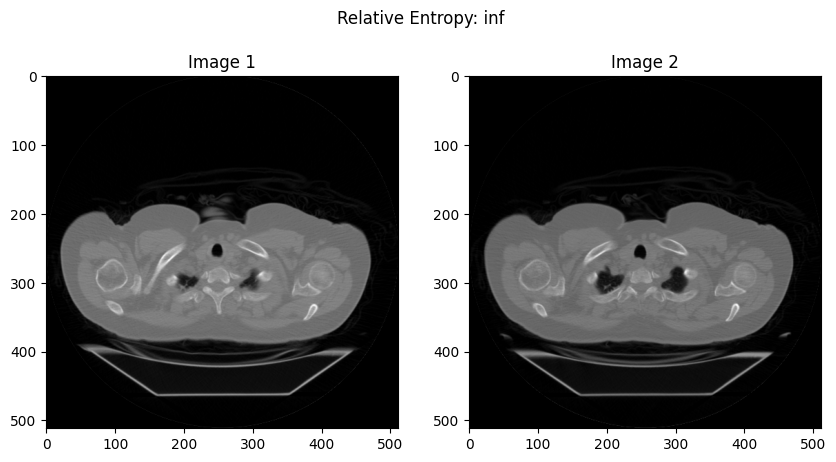

In [5]:
# Define a funcao para calcular a entropia relativa
def relative_entropy(image1, image2, num_bins=64):
    # Calculate the joint histogram
    joint_hist = joint_histogram(image1, image2, num_bins)

    # Calculate the marginal histograms for each image
    hist1 = marginal_histogram(image1, num_bins)
    hist2 = marginal_histogram(image2, num_bins)

    # Calculate the relative entropy
    rel_entropy = entropy(hist1, qk=hist2) + entropy(hist2, qk=hist1)

    return rel_entropy

# carregando as imagens
image1 = pydicom.dcmread('chest-220.dcm').pixel_array
image2 = pydicom.dcmread('chest-221.dcm').pixel_array

# Calcula a entropia relativa
rel_entropy = relative_entropy(image1, image2)

# Display the images and the relative entropy
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(image1, cmap='gray')
ax1.set_title('Image 1')
ax2.imshow(image2, cmap='gray')
ax2.set_title('Image 2')
plt.suptitle(f'Relative Entropy: {rel_entropy:.2f}')
plt.show()
